## 🔌 Développez un outil de prévision de la consommation d'énergie

🔎 **Objectif :** Créer un outil de prédiction de la consommation d'énergie en utilisant des réseaux neuronaux récurrents.

🔎 **Contexte :** Vous travaillez dans l'équipe data d'un fournisseur d'éléctricité qui cherche à se moderniser avec des outils d'Intelligence Artificielle. Vous devez travailler avec votre équipe pour proposer un réseau de neurones récurrents qui permet de prédire la consommation d'énergie de vos clients et anticiper les besoins du marché en termes d'énergie.

Vous disposez de deux sources de données. La première source vous permettra de vous initier aux prévisions sur la consommation d'une maison. La deuxième source contient une base de données proche de la réalité avec la consommation de plusieurs maisons.

C'est à vous de décider comment vous allez utiliser ces données pour réaliser votre modèle de prédiction. Pour cela, vous devez suivre les instructions de votre chef d'équipe pour réaliser au mieux ce projet.

### 🔌 Imports

💡 Import Librairies 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

💡 Import Dataset

In [2]:
df = pd.read_csv('C:/Users/zaome/Documents/Alisson/Projet_conso_energie/archive/household_power_consumption.txt', sep=';')
df.head()

C:\Users\zaome\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


💡 Data info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


💡 Convertir Date, Time et mettre en index + mettre tout en float + changer les ?

In [4]:
df = pd.read_csv('C:/Users/zaome/Documents/Alisson/Projet_conso_energie/archive/household_power_consumption.txt', sep=';', 
                 parse_dates={'datetime' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='datetime')

In [5]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


### 🔌 Exploration des données

💡 Data shape

In [6]:
df.shape

(2075259, 7)

💡 Data info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


💡 Data descriptive

In [8]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


💡 Types de valeurs

In [9]:
df_dtype = df.dtypes
df_dtype.value_counts()

float64    7
dtype: int64

💡 Valeurs manquantes

In [10]:
df.isnull().sum().sort_values()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

💡 Visualisation des valeurs manquantes

In [11]:
# import missingno as mno
# mno.matrix(df, figsize = (10, 2))

💡 Remplacer les valeurs manquantes par la moyenne

In [12]:
df = df.fillna(df.mean())
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

💡 Supprimer les valeurs manquantes

In [13]:
# df = df.dropna()

💡 Total de valeurs manquantes

In [14]:
df.isnull().sum().sum()

0

In [15]:
df.isnull().sum().sort_values()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

💡 Nan

In [16]:
df_nan = pd.DataFrame({'Nan':df.isna().sum()})
df_nan['%nan'] = df_nan['Nan']/df.shape[0]*100
round(df_nan,2).sort_values(by='%nan' , ascending=False)

,Nan,%nan
Global_active_power,0,0.0
Global_reactive_power,0,0.0
Voltage,0,0.0
Global_intensity,0,0.0
Sub_metering_1,0,0.0
Sub_metering_2,0,0.0
Sub_metering_3,0,0.0


💡 Duplicates

In [17]:
df.duplicated().sum()

168560

💡 Affichage des duplicates

In [18]:
df[df.duplicated(keep=False)]

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:50:00,3.236,0.000,235.84,13.6,0.0,0.0,17.0
2006-12-16 22:34:00,2.346,0.052,240.05,9.6,0.0,0.0,0.0
2006-12-16 22:47:00,0.284,0.000,242.04,1.2,0.0,0.0,0.0
2006-12-16 23:07:00,2.342,0.000,239.74,9.6,0.0,0.0,0.0
2006-12-17 00:30:00,0.286,0.000,244.03,1.2,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2010-11-26 15:18:00,1.272,0.060,239.76,5.2,0.0,0.0,18.0
2010-11-26 15:46:00,0.328,0.046,242.06,1.4,0.0,0.0,0.0
2010-11-26 17:37:00,1.974,0.000,236.96,8.2,0.0,0.0,17.0


### 🔌 Visualisations

💡 Plot de la moyenne de chaques features par MOIS

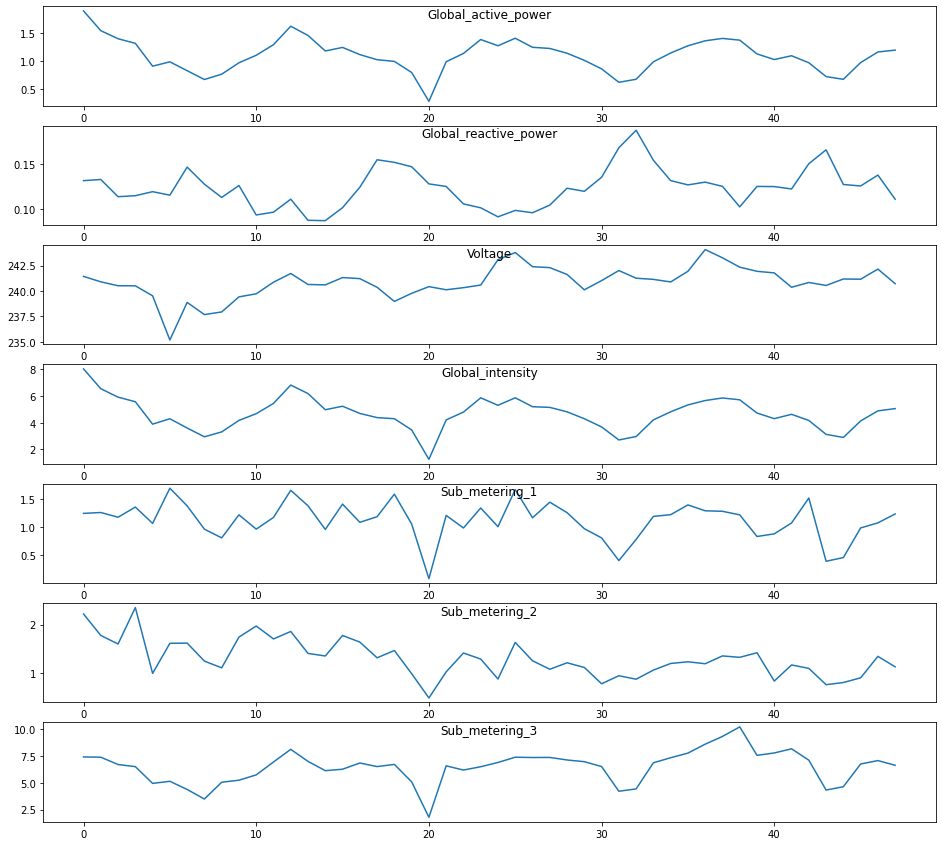

In [19]:
i = 1
cols=[0, 1, 2, 3, 4, 5, 6]
plt.figure(figsize=(16, 15))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(df.resample('M').mean().values[:, col])
    plt.title(df.columns[col], y=0.82)
    i += 1
plt.show()

💡 Plot de la moyenne de chaques features par JOUR

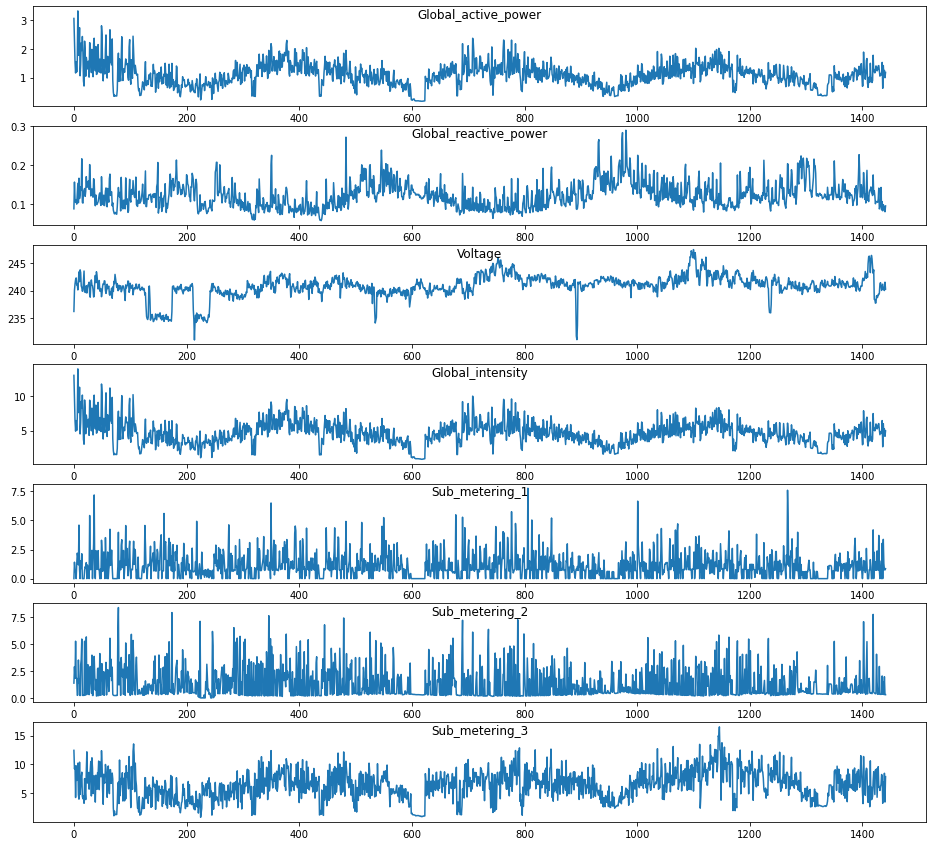

In [20]:
i = 1
cols=[0, 1, 2, 3, 4, 5, 6]
plt.figure(figsize=(16, 15))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(df.resample('D').mean().values[:, col])
    plt.title(df.columns[col], y=0.82)
    i += 1
plt.show()

💡 Plot de la moyenne de chaques features par HEURE

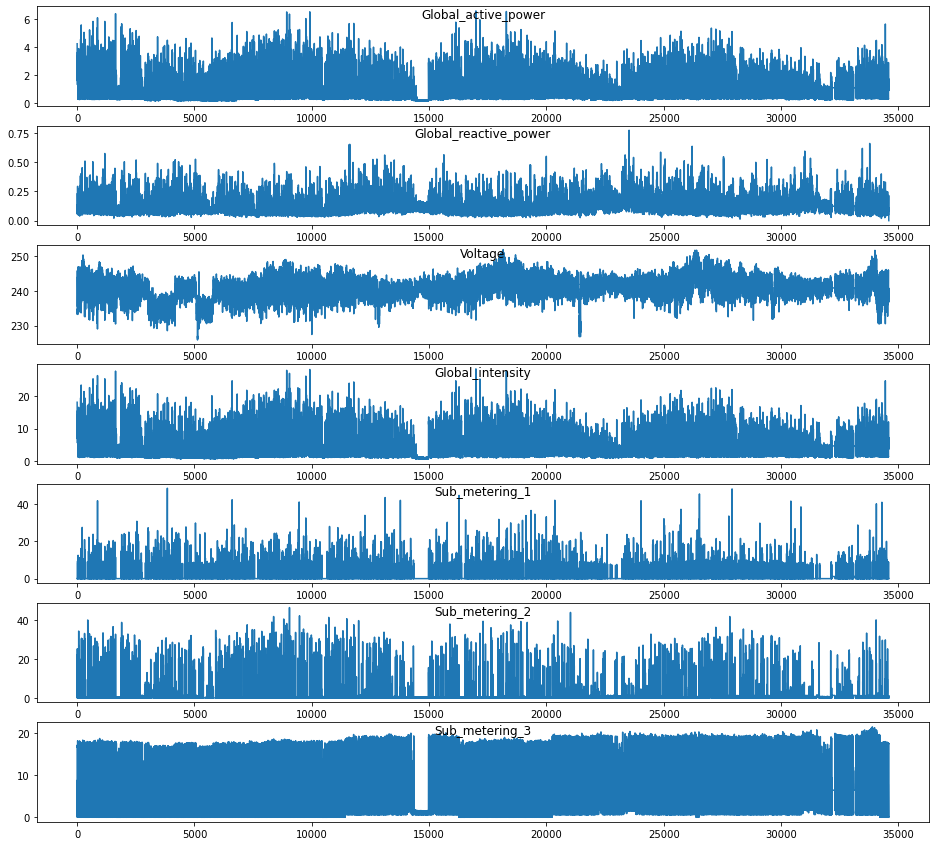

In [21]:
i = 1
cols=[0, 1, 2, 3, 4, 5, 6]
plt.figure(figsize=(16, 15))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(df.resample('h').mean().values[:, col])
    plt.title(df.columns[col], y=0.82)
    i += 1
plt.show()

* Le resampling par mois, jour ou par heure est très important car il a une grande interaction. Il y a un changement de la périodicité du système.
* Par conséquent, si l'on traite toutes les données d'origine, le temps d'exécution sera très coûteux, mais si l'on traite des données avec de grands échantillons temporels (par exemple, mensuels), cela affectera la prédictivité du modèle.
* D'après les viz, nous pouvons voir qu'il est relativement raisonnable de resampling les données par heure.

💡 Correlations

In [22]:
df.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.247017,-0.399762,0.998889,0.484401,0.434569,0.638555
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120,0.123111,0.139231,0.089617
Voltage,-0.399762,-0.112246,1.000000,-0.411363,-0.195976,-0.167405,-0.268172
Global_intensity,0.998889,0.266120,-0.411363,1.000000,0.489298,0.440347,0.626543
Sub_metering_1,0.484401,0.123111,-0.195976,0.489298,1.000000,0.054721,0.102571
Sub_metering_2,0.434569,0.139231,-0.167405,0.440347,0.054721,1.000000,0.080872
Sub_metering_3,0.638555,0.089617,-0.268172,0.626543,0.102571,0.080872,1.000000


💡 Heatmap correlations

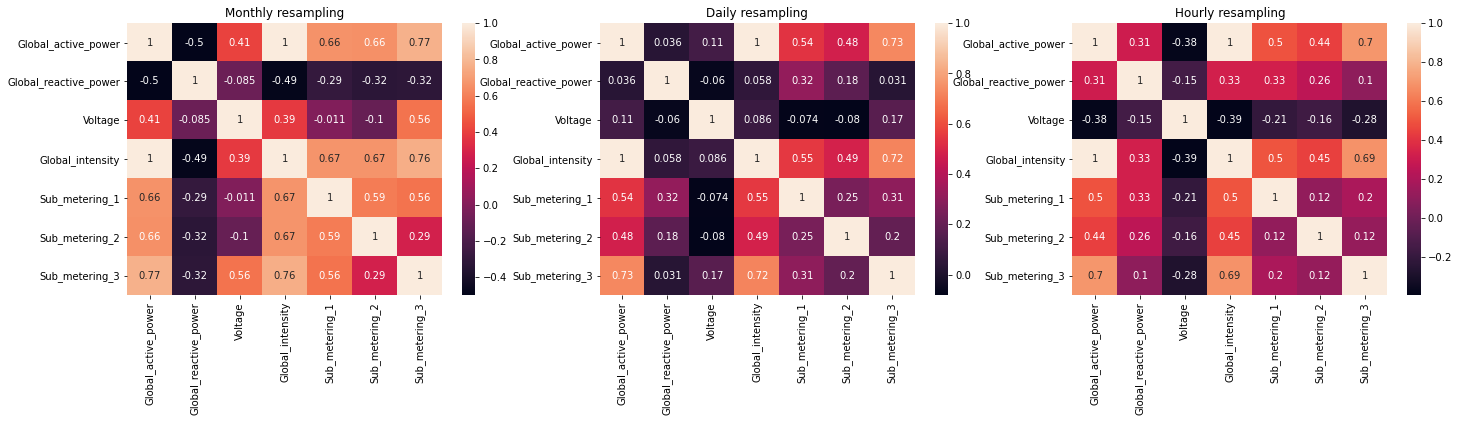

In [23]:
f = plt.figure(figsize=(24,5))

#Mois
ax = f.add_subplot(131)
dfm = df.resample('M').mean()
sns.heatmap(dfm.corr(), annot=True)
plt.title('Monthly resampling', size=12)

#Jour
ax=f.add_subplot(132)
dfd = df.resample('D').mean()
sns.heatmap(dfd.corr(), annot=True)
plt.title('Daily resampling', size=12)

#Heure
ax = f.add_subplot(133)
dfh = df.resample('h').mean()
sns.heatmap(dfh.corr(), annot=True)
plt.title('Hourly resampling', size=12)

plt.show()

* Le tableau ci-dessus montre que 'Global_intensity' et 'Global_active_power' sont corrélées. Mais 'Voltage' et 'Global_active_power' sont moins corrélés.

* On voit donc qu'avec les techniques de resampling, on peut modifier les corrélations entre les features.

### 🔌 Preprocessing

💡 Import librairies

In [24]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

💡 X et y 

In [25]:
# X = df.drop(labels=['Global_active_power'], axis=1)
# y = df['Global_active_power']

In [26]:
# y = np.array(df.iloc[:,0].values)
# X = np.array(df.iloc[:,1:].values)

#### !! A COMPRENDRE !! 🤔

💡 Shift

In [27]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(-i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i==0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1)) for j in range(n_vars)]        
        agg = pd.concat(cols, axis=1)
        agg.columns = names
        if dropnan:
            agg.dropna(inplace=True)
        return agg

* Rééchantillonnage des données sur une heure pour réduire la taille des données.

💡 Resample

In [28]:
df_resample = df.resample('h').mean() 
df_resample.shape

(34589, 7)

💡 Scalling

In [29]:
values = df_resample.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [30]:
reframed = series_to_supervised(scaled, 1, 1)
r = list(range(df_resample.shape[1] + 1, 2*df_resample.shape[1]))
reframed.drop(reframed.columns[r], axis=1, inplace=True)
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var1(t)
0,0.545045,0.103358,0.335501,0.541487,0.0,0.144652,0.782676,0.636816
1,0.509006,0.110073,0.283802,0.502152,0.0,0.030869,0.774169,0.545045
2,0.488550,0.096987,0.315987,0.481110,0.0,0.000000,0.778809,0.509006
3,0.455597,0.099010,0.434417,0.449904,0.0,0.008973,0.798917,0.488550
4,0.322555,0.072536,0.495847,0.323529,0.0,0.002872,0.205723,0.455597


💡 Data spliting

In [31]:
values = reframed.values
n_train_time = 365*24

train = values[:n_train_time, :]
test = values[n_train_time:, :]

💡 X_train/X_test

In [32]:
X_train, y_train = train[:, :-1], train[:, -1]
X_test, y_test = test[:, :-1], test[:, -1]

In [33]:
# X_train = X_train.values
# X_test = X_test.values

💡 Reshape

In [34]:
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

💡 Scalling

In [35]:
# scal_train_X = (X_train - X_train.mean()) / X_train.std()
# scal_test_X = (X_test - X_train.mean()) / X_train.std()

💡 Shape

In [36]:
print(X_train.shape)
print(y_train.shape)

(8760, 1, 7)
(8760,)


### 🔌 Modelisation

💡 Import libriries

In [37]:
from tensorflow import keras
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

💡 Shape

In [38]:
input_shape = X_train.shape[1]
input_shape

1

In [39]:
input_shape = X_train.shape[2]
input_shape

7

### 🔌 Première itération avec LSTM

💡 Couches du modele 

In [40]:
model = Sequential()
model.add(LSTM(100, input_shape = (X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))

💡 Model compile

In [41]:
model.compile(loss = 'mean_squared_error', 
              optimizer = 'adam',
              metrics = 'mse')

💡 Model fit

In [42]:
X_train.shape

(8760, 1, 7)

In [43]:
history = model.fit(X_train, y_train,
                    validation_split = 0.2,
                    batch_size = 64,
                    epochs = 40,
                    verbose = 1,
                    shuffle = False)

Epoch 1/40
110/110 [==============================] - 2s 6ms/step - loss: 0.0226 - mse: 0.0226 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 2/40
110/110 [==============================] - 1s 5ms/step - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 3/40
110/110 [==============================] - 1s 5ms/step - loss: 0.0121 - mse: 0.0121 - val_loss: 0.0144 - val_mse: 0.0144
Epoch 4/40
110/110 [==============================] - 0s 2ms/step - loss: 0.0115 - mse: 0.0115 - val_loss: 0.0138 - val_mse: 0.0138
Epoch 5/40
110/110 [==============================] - 0s 2ms/step - loss: 0.0112 - mse: 0.0112 - val_loss: 0.0134 - val_mse: 0.0134
Epoch 6/40
110/110 [==============================] - 0s 2ms/step - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0132 - val_mse: 0.0132
Epoch 7/40
110/110 [==============================] - 0s 2ms/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0130 - val_mse: 0.0130
Epoch 8/40
110/110 [==============================] - 0s 2ms/step - loss: 0.

💡 Score RMSE

In [44]:
# rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
# print('Test RMSE: %.3f' % rmse)

💡 Summary

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               43200     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 43,301
Trainable params: 43,301
Non-trainable params: 0
_________________________________________________________________


💡 Learning curve

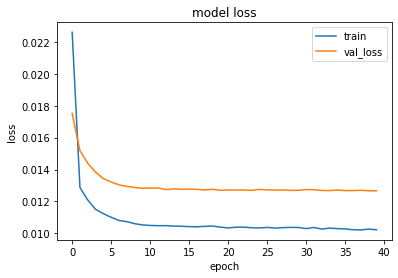

In [46]:
#Courbe loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val_loss'])

plt.show()

#Courbe mse
# plt.plot(history.history['mse'])
# plt.plot(history.history['val_mse'])

# plt.title('model loss')
# plt.ylabel('mse')
# plt.xlabel('epoch')
# plt.legend(['train', 'val_mse'])

# plt.show()

💡 Prediction test

In [47]:
size = df_resample.shape[1]

In [48]:
yhat = model.predict(X_test)
X_test = X_test.reshape((X_test.shape[0], size))

In [49]:
X_test.shape

(25828, 7)

💡 Invert scaling for prediction

In [50]:
inv_yhat = np.concatenate((yhat, X_test[:, 1-size:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

💡 Invert scaling for actual

In [51]:
test_y = y_test.reshape((len(y_test), 1))
inv_y = np.concatenate((test_y, X_test[:, 1-size:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

💡 Score RMSE

In [52]:
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.597


💡 Prediction en heures (sur 7 jours)

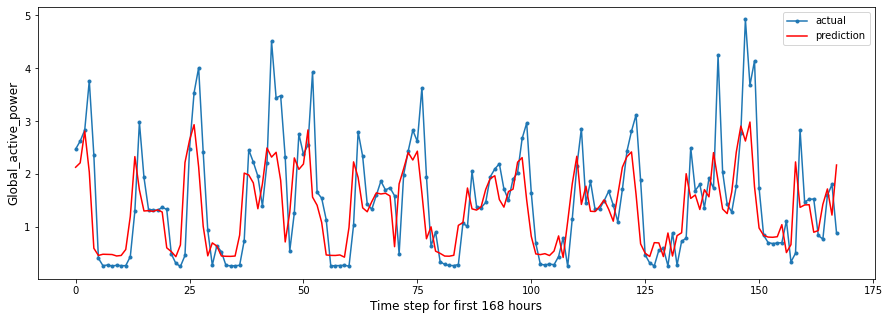

In [53]:
df_pred = [x for x in range(168)]

plt.figure(figsize=(15,5)) 
plt.plot(df_pred, inv_y[:168], marker='.', label="actual")
plt.plot(df_pred, inv_yhat[:168], 'r', label="prediction")
plt.ylabel(df.columns[0], size=12)
plt.xlabel('Time step for first 168 hours', size=12)
plt.legend(fontsize=10)

plt.show()

💡 Prediction en heures (sur 30 jours)

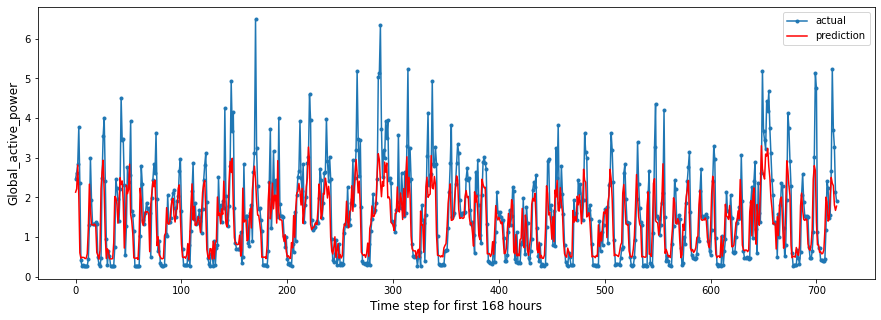

In [54]:
df_pred = [x for x in range(720)]

plt.figure(figsize=(15,5)) 
plt.plot(df_pred, inv_y[:720], marker='.', label="actual")
plt.plot(df_pred, inv_yhat[:720], 'r', label="prediction")
plt.ylabel(df.columns[0], size=12)
plt.xlabel('Time step for first 168 hours', size=12)
plt.legend(fontsize=10)

plt.show()